# Transformation of a variable in the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer
import seaborn as sns


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
#check the head values of the data set 
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
import warnings 
warnings.filterwarnings("ignore")

<Axes: xlabel='Cholesterol', ylabel='Density'>

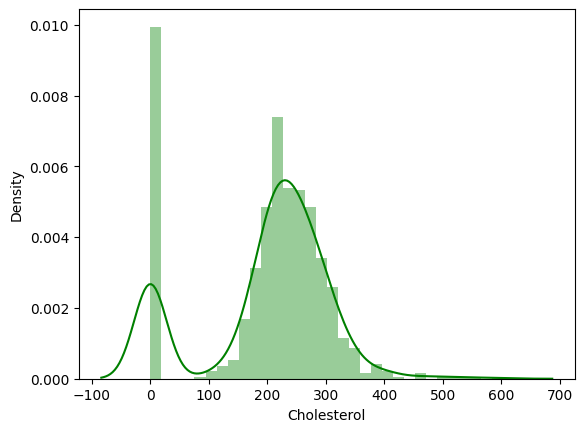

In [6]:
#now let us plot the distribution of the cholestrol 
sns.distplot(df["Cholesterol"],color='green')

In [7]:
len(df['Age'].unique())

50

In [8]:
def plot_distribution(data,var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(data[var],color="red")
    plt.subplot(1,2,2)
    stats.probplot(data[var], dist="norm", plot=plt)
    plt.show()
    
    
    

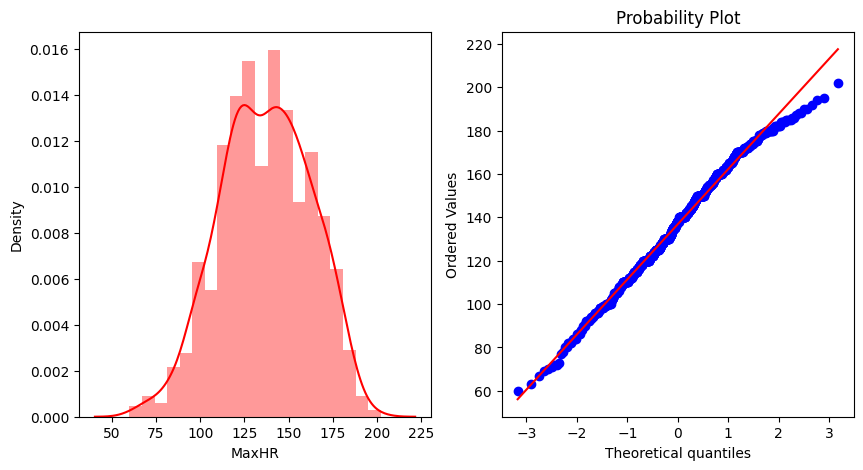

In [9]:
#the MaxHr with out any transfomation 
plot_distribution(data=df,var="MaxHR")

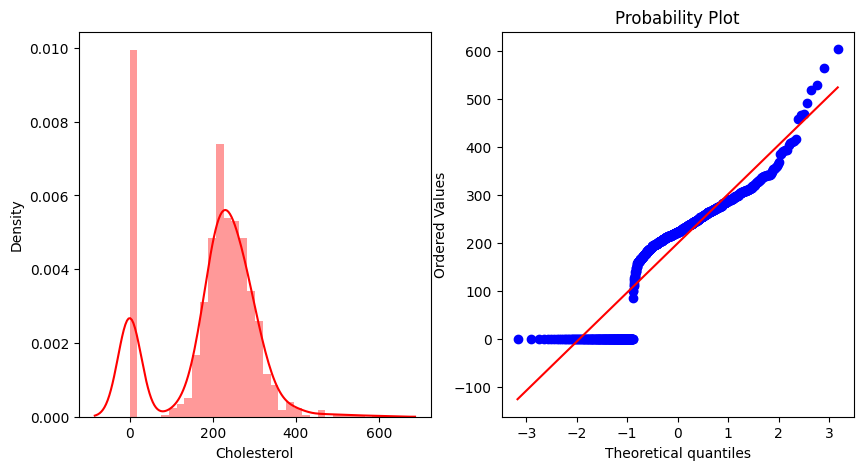

In [10]:
#let see the cholestrol for the cholestrol column 
plot_distribution(data=df,var="Cholesterol")

In [11]:
# the cholestrol column is some what skewed 


In [12]:
#now let us see the types of the transformation

# Log Transformation

In [13]:
#in these we will use the log transformation on the variable 
#these tranformation can be applied to only the possitives
data=df.copy()

In [14]:
data['MaxHR']=np.log(data['MaxHR'])

In [15]:
data['MaxHR']

0      5.147494
1      5.049856
2      4.584967
3      4.682131
4      4.804021
         ...   
913    4.882802
914    4.948760
915    4.744932
916    5.159055
917    5.153292
Name: MaxHR, Length: 918, dtype: float64

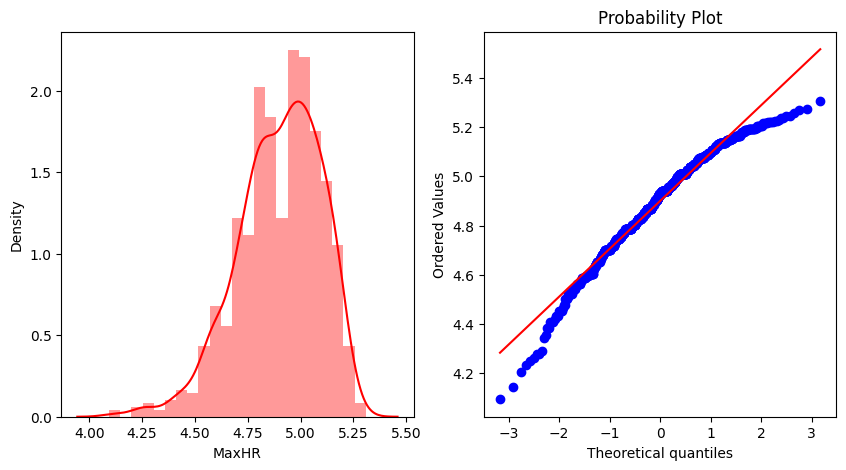

In [16]:
plot_distribution(data=data,var="MaxHR")

In [17]:
res=FunctionTransformer(np.log)

<Axes: xlabel='MaxHR', ylabel='Density'>

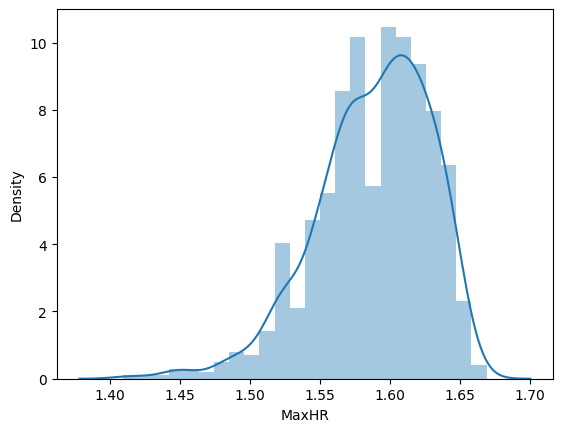

In [18]:
sns.distplot(res.transform(data['MaxHR']))

In [19]:
feature=LogTransformer(variables=['MaxHR'])
feature.fit_transform(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,5.147494,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,5.049856,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,4.584967,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,4.682131,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,4.804021,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,4.882802,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,4.948760,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,4.744932,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,5.159055,N,0.0,Flat,1


In [20]:
#now let us discuss another transformation known as reciprocal Tranfromation the value in the varible can not be the zero

# Reciprocal Tranformation 

In [21]:
#the varibles are transformed by using the formula 1/x


In [22]:
#let us import another data set

In [23]:
df1=pd.read_csv("train (3).csv")

In [24]:
df1.shape

(2000, 21)

In [25]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [26]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: xlabel='px_height', ylabel='Density'>

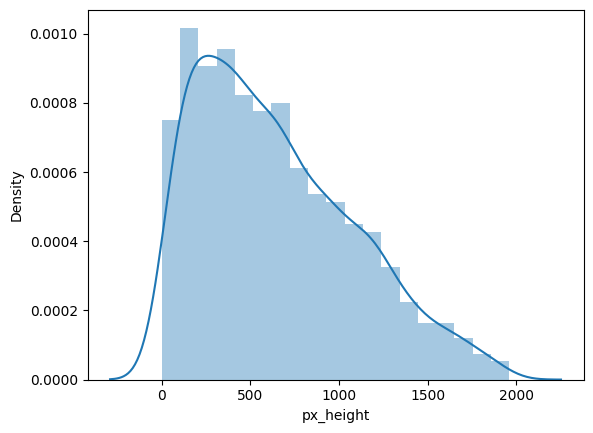

In [27]:
sns.distplot(df1["px_height"])

In [28]:
#the above distribution is some what skewed towards the right side

In [29]:
data2=df1.copy()

In [30]:
data2["px_height"]=np.reciprocal(data2['px_height'])

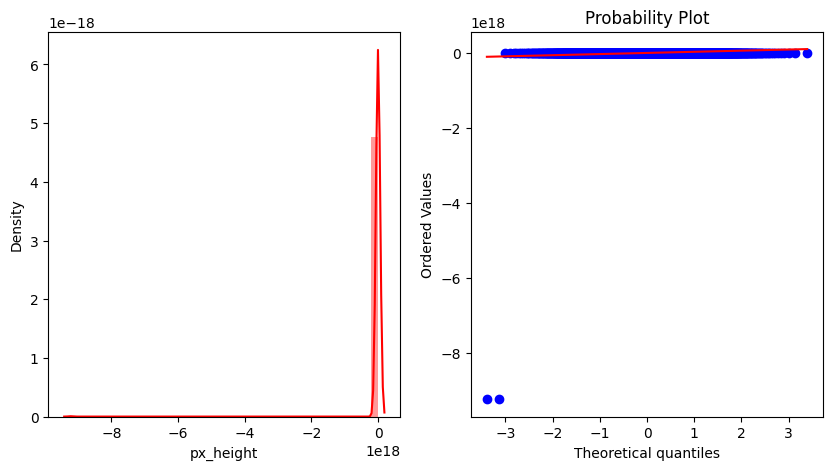

In [31]:
plot_distribution(data=data2,var="px_height")

In [32]:
res1=FunctionTransformer(np.reciprocal)

In [33]:
data=pd.read_csv("train (2).csv")

In [34]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


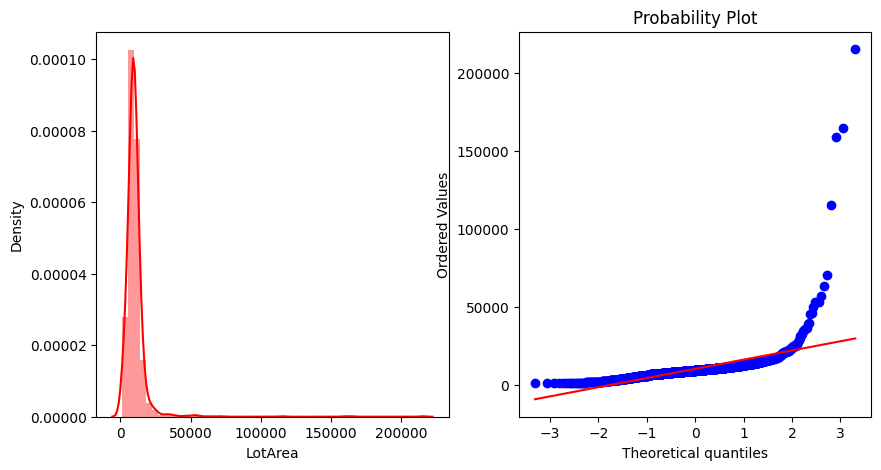

In [35]:
plot_distribution(data=data,var="LotArea")

In [36]:
data["LotArea"]=res.fit_transform(data['LotArea'])

In [37]:
data['LotArea']

0       9.041922
1       9.169518
2       9.328123
3       9.164296
4       9.565214
          ...   
1455    8.976768
1456    9.486076
1457    9.109636
1458    9.181632
1459    9.204020
Name: LotArea, Length: 1460, dtype: float64

# Square root  And Cube root  Transformation 

In [38]:
data3=pd.read_csv("train (1).csv")

In [39]:
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


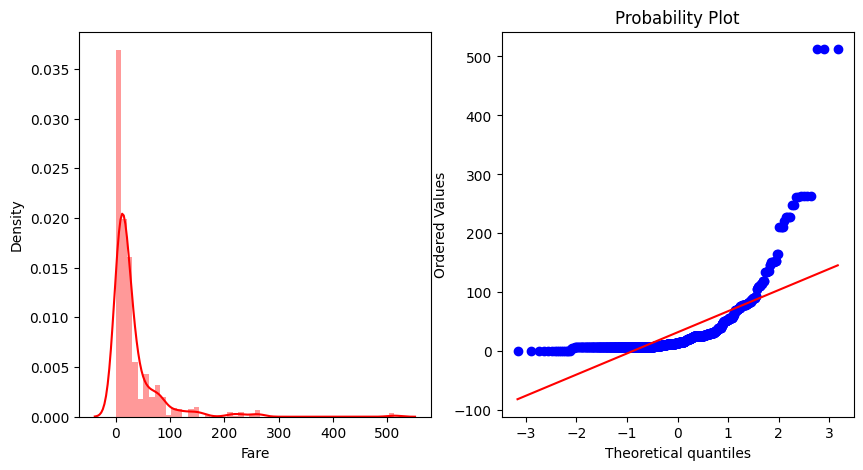

In [40]:
plot_distribution(data=data3,var="Fare")

In [41]:
trans=FunctionTransformer(np.sqrt)

In [42]:
data3['Fare']=trans.fit_transform(data3["Fare"])

In [43]:
data3['Fare']

0      2.692582
1      8.442944
2      2.815138
3      7.286975
4      2.837252
         ...   
886    3.605551
887    5.477226
888    4.842520
889    5.477226
890    2.783882
Name: Fare, Length: 891, dtype: float64

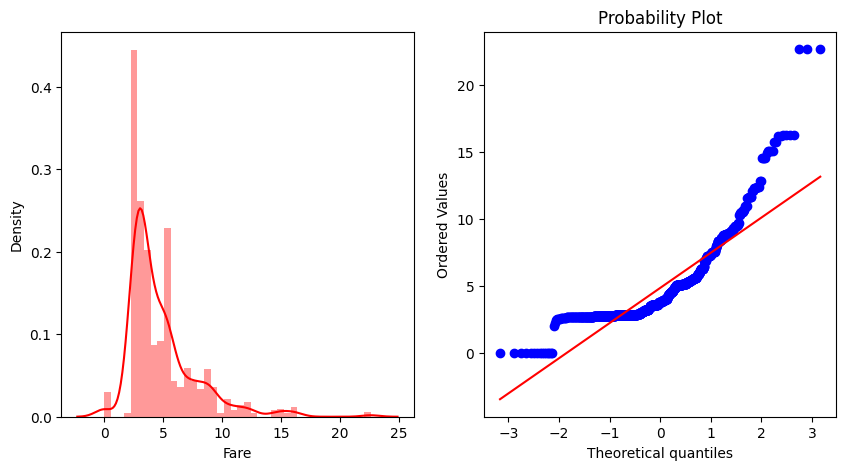

In [44]:
plot_distribution(data=data3,var="Fare")

In [45]:
trans1=FunctionTransformer(np.cbrt)

In [46]:
data3['Fare']=trans1.fit_transform(data3['Fare'])

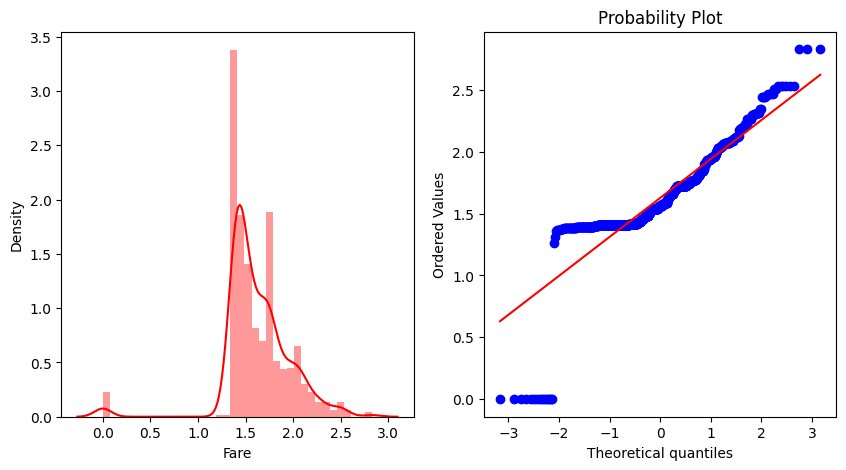

In [47]:
plot_distribution(data=data3,var="Fare")

In [48]:
#Another Method of the trabnsformation 


# Power Transformation technique 

In [49]:
data4=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [50]:
data4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


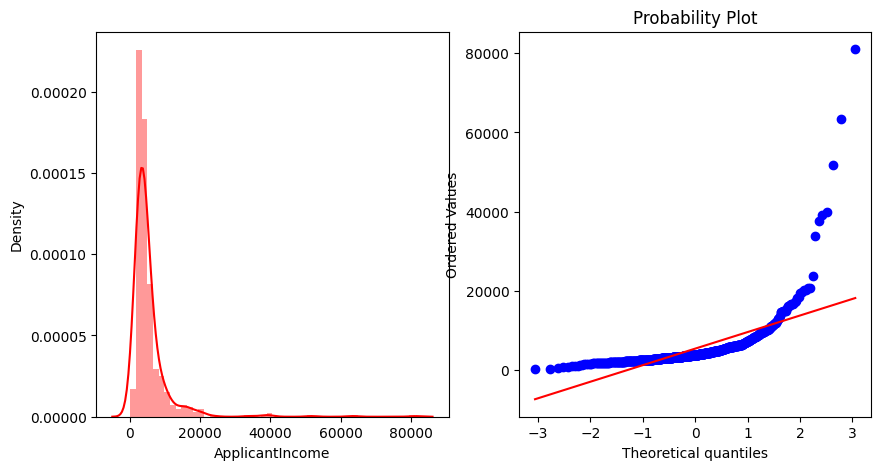

In [51]:
plot_distribution(data=data4,var="ApplicantIncome")

In [52]:
trans2=FunctionTransformer(np.power(data4["ApplicantIncome"],0.4))

In [53]:
data4["ApplicantIncome"]=trans.fit_transform(data4["ApplicantIncome"])

In [54]:
#let us come to the another transformation


# Box Cox Transformation

In [69]:
#these method is only useful for the possitive values

In [99]:
#((x+1)-1/lam)

In [70]:
from feature_engine.transformation import BoxCoxTransformer

In [71]:
#now let us import the data set

In [72]:
df=pd.read_csv("titan.csv")

In [73]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
from sklearn.preprocessing import PowerTransformer

In [75]:
box=PowerTransformer(method="box-cox")

In [76]:
#now let us transform the column Fare

In [83]:
df["Age"]=box.fit_transform(df["Age"].to_frame())

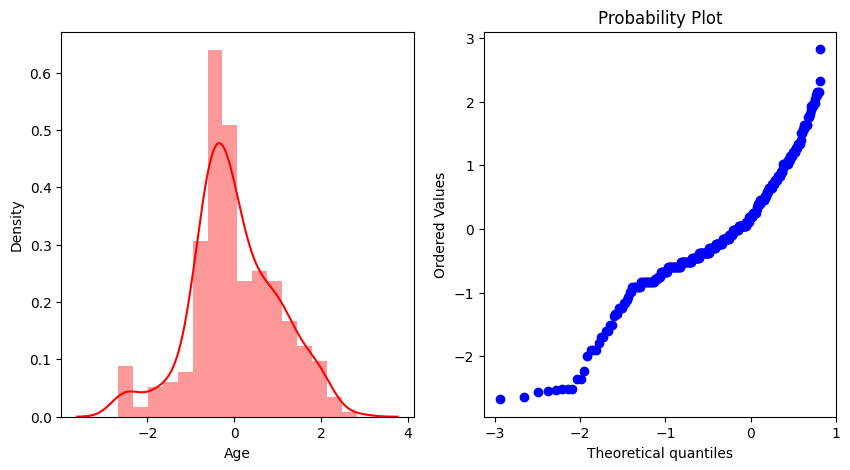

In [85]:
plot_distribution(data=df,var="Age")

In [86]:
box.lambdas_

array([0.74478085])

# Yeo-johson Transformation of variables

In [100]:
#yeo-johson formula =(x+1)^lam-1/lam

In [88]:
#these method can be applied to any variable in the data set that means for possitive,negatives also

In [89]:
from sklearn.preprocessing import PowerTransformer

In [93]:
yo_trans=PowerTransformer()

In [95]:
df['Fare']=yo_trans.fit_transform(df["Fare"].to_frame())

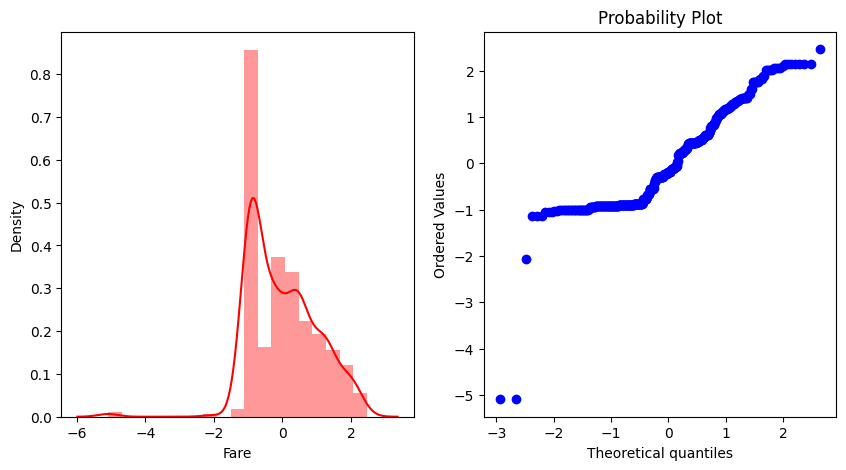

In [96]:
plot_distribution(data=df,var="Fare")

In [98]:
yo_trans.lambdas_

array([-0.28244999])

In [97]:
#i think we have discussed all the transformation needed 